In [5]:
import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\Delhi's Climate Data Analysis\data\raw\Delhi_Temp_Data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')

df.head()


,_id,Date,Rain,Temp Max,Temp Min,Year,Month,Month_Name
0,1,1951-01-01,0.0,20.139999,3.68,1951,1,January
1,2,1951-02-01,0.0,21.680000,3.60,1951,2,February
2,3,1951-03-01,0.0,21.280001,3.51,1951,3,March
3,4,1951-04-01,0.0,21.610001,4.09,1951,4,April
4,5,1951-05-01,0.0,21.389999,5.10,1951,5,May


In [6]:
# Group by Year and Month
monthly_df = df.groupby(['Year', 'Month', 'Month_Name'], as_index=False).agg({
    'Rain': 'mean',
    'Temp Max': 'mean',
    'Temp Min': 'mean'
})

# Create a date column for sorting
monthly_df['Date'] = pd.to_datetime(monthly_df[['Year', 'Month']].assign(DAY=1))

# Sort by date
monthly_df.sort_values(by='Date', inplace=True)

monthly_df.head()


,Year,Month,Month_Name,Rain,Temp Max,Temp Min,Date
0,1951,1,January,2.168448,25.000323,10.958064,1951-01-01
1,1951,2,February,1.924850,29.257500,12.879643,1951-02-01
2,1951,3,March,1.969674,30.047742,15.193871,1951-03-01
3,1951,4,April,0.162916,34.591667,18.865000,1951-04-01
4,1951,5,May,0.000000,37.765161,22.823548,1951-05-01


In [7]:
# Monthly average temperature (average of daily max and min)
df['Avg_Temp'] = (df['Temp Max'] + df['Temp Min']) / 2

# Group by Year & Month
monthly_temp = df.groupby(['Year', 'Month', 'Month_Name'], as_index=False)['Avg_Temp'].mean()

# Add a datetime column for plotting
monthly_temp['Date'] = pd.to_datetime(monthly_temp[['Year', 'Month']].assign(DAY=1))

# Sort by date
monthly_temp.sort_values('Date', inplace=True)

monthly_temp.head()

,Year,Month,Month_Name,Avg_Temp,Date
0,1951,1,January,17.979193,1951-01-01
1,1951,2,February,21.068571,1951-02-01
2,1951,3,March,22.620806,1951-03-01
3,1951,4,April,26.728334,1951-04-01
4,1951,5,May,30.294355,1951-05-01


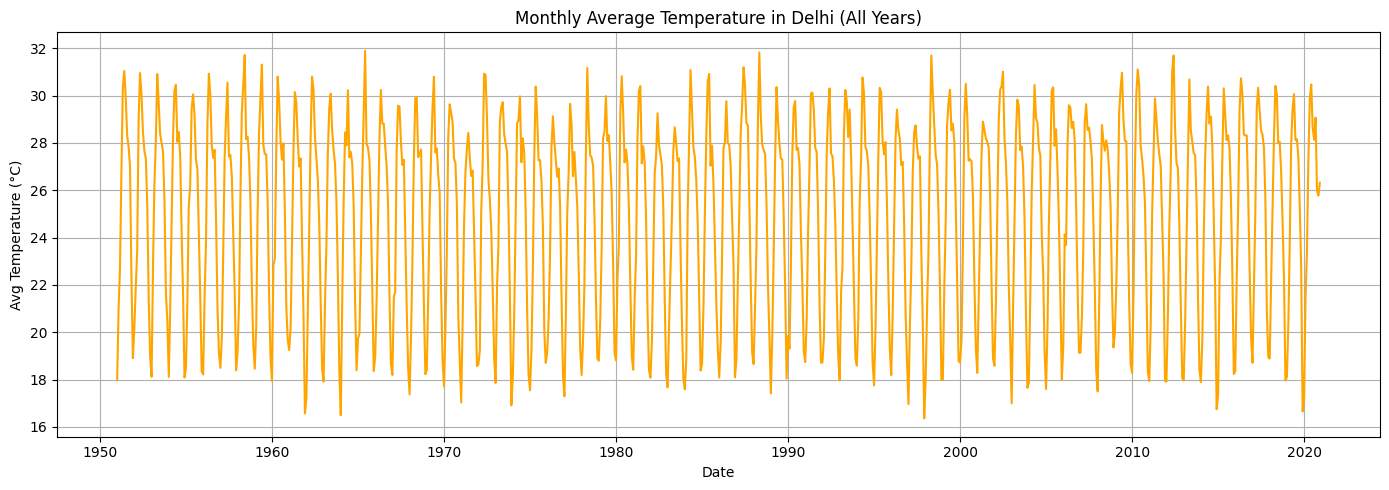

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(monthly_temp['Date'], monthly_temp['Avg_Temp'], color='orange')
plt.title('Monthly Average Temperature in Delhi (All Years)')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\alpes\AppData\Local\Temp\ipykernel_3268\3575000824.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month_Name', y='Avg_Temp', data=monthly_temp, order=month_order, palette='Oranges')


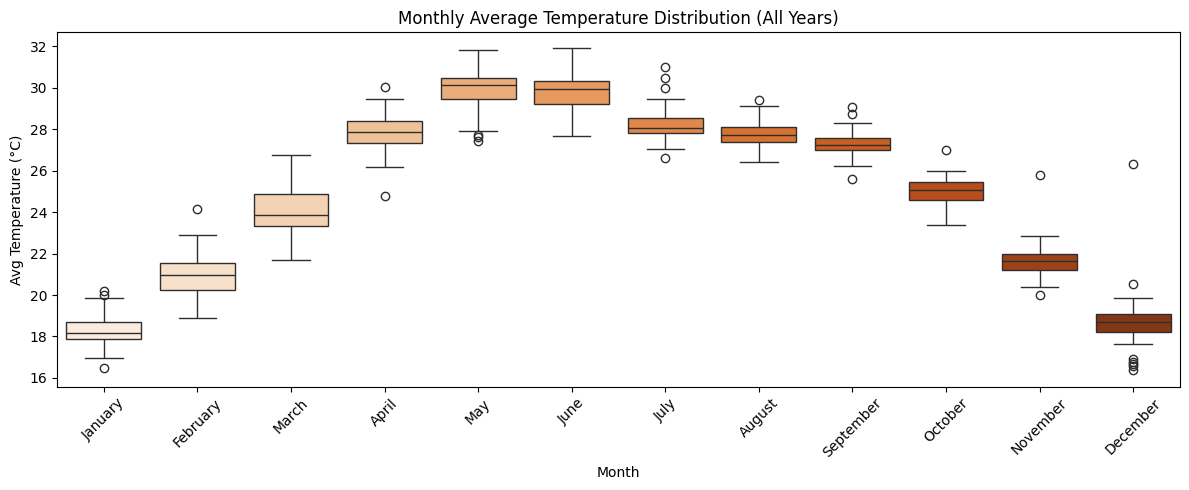

In [9]:
import seaborn as sns
import calendar

month_order = list(calendar.month_name)[1:]  # January to December

plt.figure(figsize=(12, 5))
sns.boxplot(x='Month_Name', y='Avg_Temp', data=monthly_temp, order=month_order, palette='Oranges')
plt.title('Monthly Average Temperature Distribution (All Years)')
plt.xlabel('Month')
plt.ylabel('Avg Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


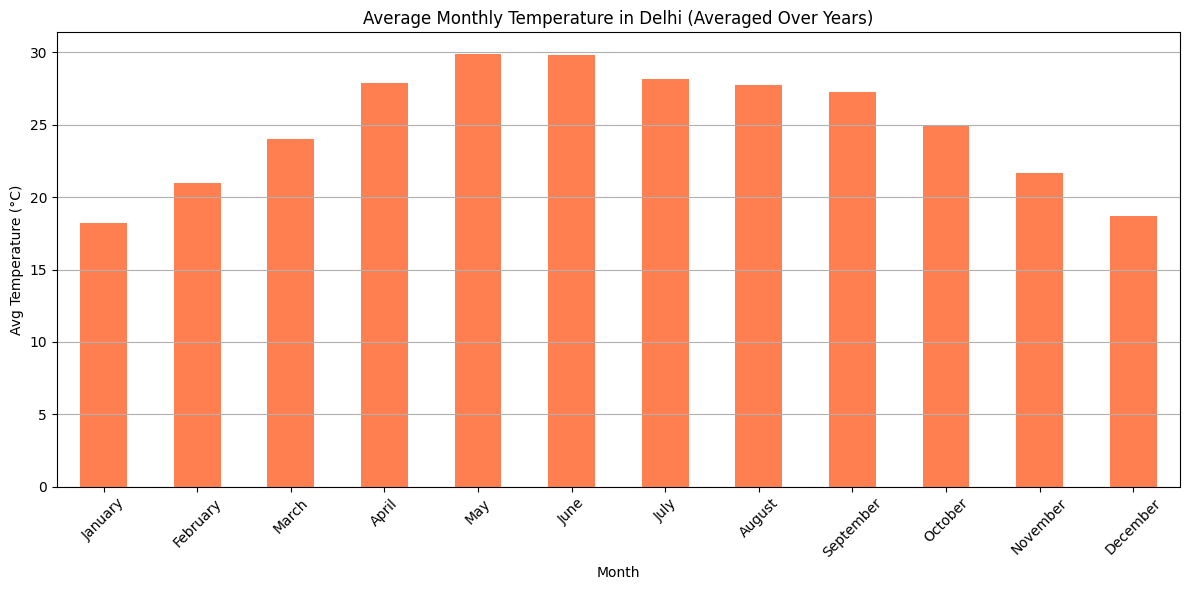

In [10]:
avg_temp_by_month = monthly_temp.groupby('Month_Name')['Avg_Temp'].mean().reindex(month_order)

plt.figure(figsize=(12, 6))
avg_temp_by_month.plot(kind='bar', color='coral')
plt.title('Average Monthly Temperature in Delhi (Averaged Over Years)')
plt.ylabel('Avg Temperature (°C)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


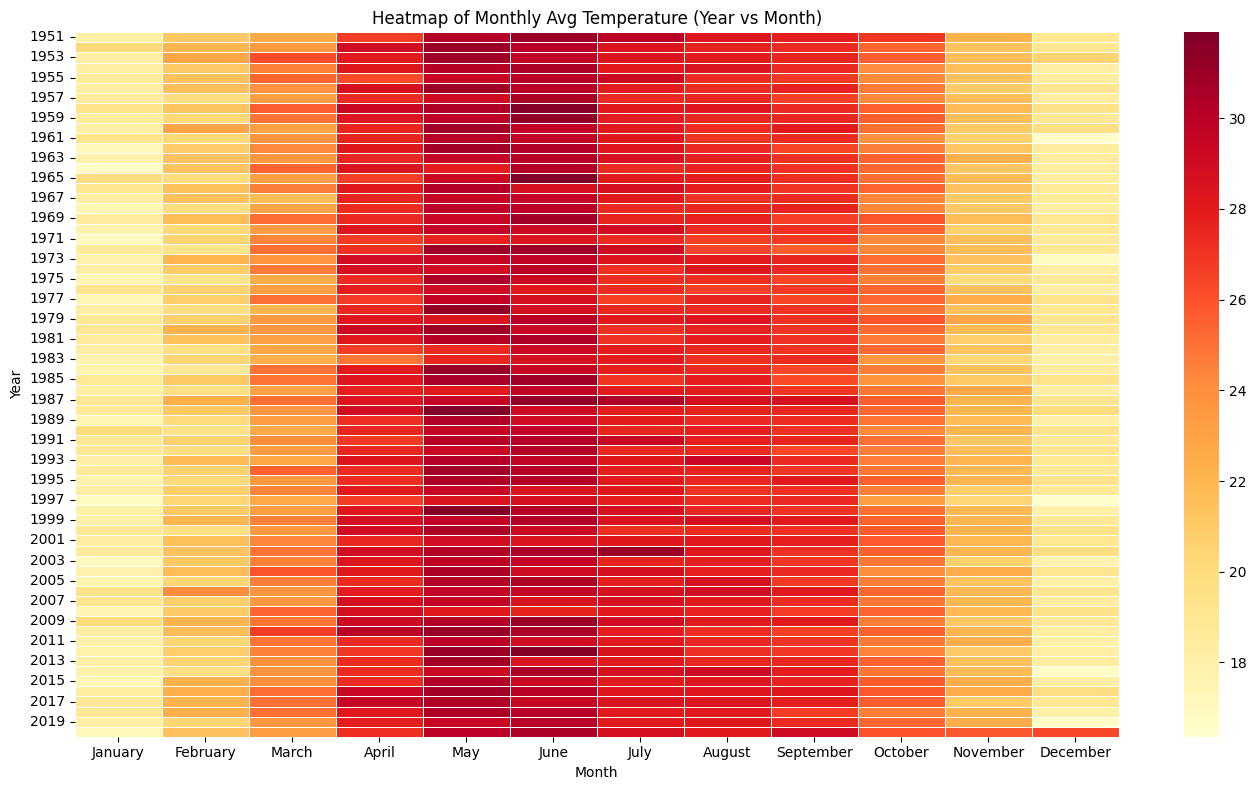

In [11]:
pivot_temp = monthly_temp.pivot(index='Year', columns='Month_Name', values='Avg_Temp')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_temp = pivot_temp[month_order]

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_temp, cmap='YlOrRd', linecolor='white', linewidths=0.5, annot=False)
plt.title('Heatmap of Monthly Avg Temperature (Year vs Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


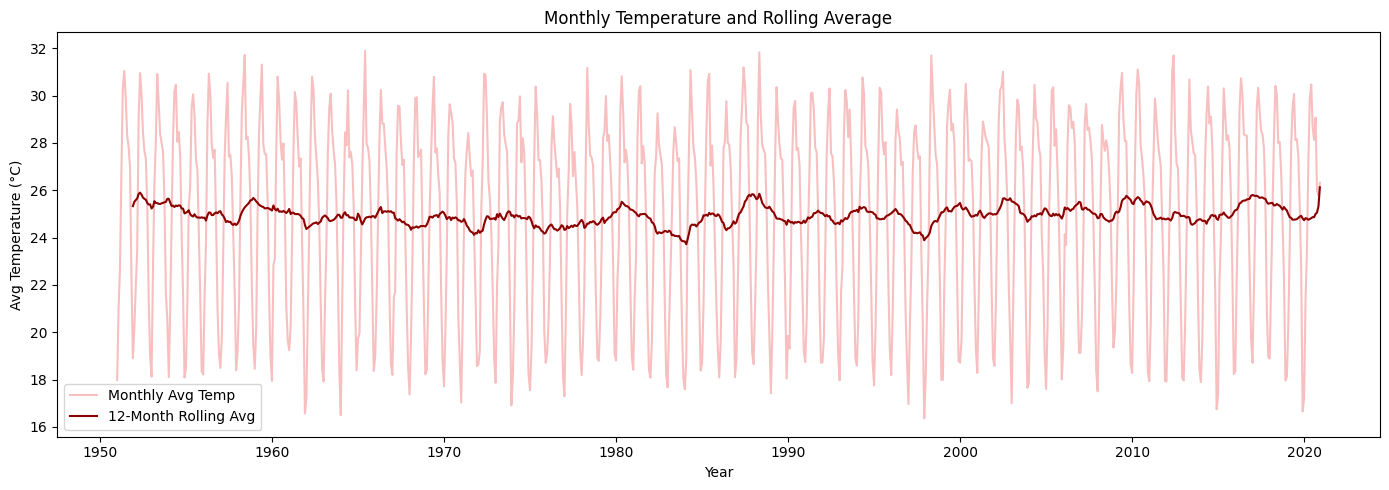

In [14]:
monthly_temp['Rolling_Mean'] = monthly_temp['Avg_Temp'].rolling(window=12).mean()

plt.figure(figsize=(14, 5))
plt.plot(monthly_temp['Date'], monthly_temp['Avg_Temp'], color='lightcoral', label='Monthly Avg Temp', alpha=0.5)
plt.plot(monthly_temp['Date'], monthly_temp['Rolling_Mean'], color='darkred', label='12-Month Rolling Avg')
plt.title('Monthly Temperature and Rolling Average')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()
